## Exercici 1
Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0)

In [601]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_flights = pd.read_csv("DelayedFlights.csv")
print(df_flights.info())
df_flights = df_flights.sample(5000, random_state = 27) # Sample muy pequeña para poder ejecutar sin que consuma mucho tiempo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [602]:
# Utilizar solo datos numéricos
flights_int = df_flights.loc[:,(df_flights.dtypes=='int').values]
flights_float = df_flights.loc[:,(df_flights.dtypes=='float').values]
df_flights = pd.concat([flights_int, flights_float], axis=1)

df_flights.drop(columns = 'Unnamed: 0', inplace=True) # Esta columna es como un Id, así que no la necesitamos. 
# Conservo FlightNum porque la asignación de números de vuelo suele hacerse en función de información sobre el trayecto

count_nan_in_df = df_flights.isnull().sum()
print(count_nan_in_df)

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
FlightNum               0
Distance                0
Cancelled               0
Diverted                0
DepTime                 0
ArrTime                20
ActualElapsedTime      22
CRSElapsedTime          0
AirTime                22
ArrDelay               22
DepDelay                0
TaxiIn                 20
TaxiOut                 1
CarrierDelay         1780
WeatherDelay         1780
NASDelay             1780
SecurityDelay        1780
LateAircraftDelay    1780
dtype: int64


Al comprobar la existencia de valores nulos por columna, me llamó especialmente la atención que hubiera tres instancias de ArrTime. Esto quiere decir que hay vuelos sin hora de llegada. Para investigar acerca la causa de esta falta de información, visualicé las filas con ArrTime nulo. 

In [603]:
df_nan = df_flights.loc[df_flights['ArrTime'].isna() == True]

#Elimnar algunas columnas del df para poder verlas todas
df_nan.drop(columns = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], inplace=True)
display(df_nan)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,TaxiIn,TaxiOut
1765012,2008,12,26,5,1500,1620,1810,423,0,1,1726.0,NaN,NaN,80.0,NaN,NaN,7.0
1864381,2008,12,21,7,850,1245,25,2603,1,0,1518.0,NaN,NaN,355.0,NaN,NaN,NaN
1493520,2008,9,21,7,615,630,4176,296,0,1,730.0,NaN,NaN,75.0,NaN,NaN,21.0
37854,2008,1,31,4,600,808,2089,643,0,1,633.0,NaN,NaN,128.0,NaN,NaN,10.0
494235,2008,3,15,6,1401,1550,157,547,0,1,1433.0,NaN,NaN,109.0,NaN,NaN,27.0
846900,2008,5,21,3,1525,2025,388,1231,0,1,1551.0,NaN,NaN,180.0,NaN,NaN,15.0
1250204,2008,7,30,3,1859,2354,749,1417,0,1,1907.0,NaN,NaN,235.0,NaN,NaN,25.0
1248242,2008,7,27,7,552,559,86,2421,0,1,709.0,NaN,NaN,314.0,NaN,NaN,10.0
1154852,2008,7,23,3,1548,1909,688,733,0,1,1749.0,NaN,NaN,141.0,NaN,NaN,45.0
1278607,2008,8,14,4,1820,1835,1771,833,0,1,1850.0,NaN,NaN,135.0,NaN,NaN,6.0


Todos los vuelos con ArrTime nulo están Cancelled o Diverted y su ActualElapsedTime es nulo también. 

Después, decidí comprobar si todos los vuelos cancelados o desviados se correspondían con aquellos que no tenían duración (ActualElapsedTime como Nan).

In [604]:
df_diverted = df_flights.loc[df_flights['Diverted'] > 0]
df_diverted.drop(columns = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], inplace=True)
display(df_diverted)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,TaxiIn,TaxiOut
1765012,2008,12,26,5,1500,1620,1810,423,0,1,1726.0,NaN,NaN,80.0,NaN,NaN,7.0
1493520,2008,9,21,7,615,630,4176,296,0,1,730.0,NaN,NaN,75.0,NaN,NaN,21.0
37854,2008,1,31,4,600,808,2089,643,0,1,633.0,NaN,NaN,128.0,NaN,NaN,10.0
494235,2008,3,15,6,1401,1550,157,547,0,1,1433.0,NaN,NaN,109.0,NaN,NaN,27.0
846900,2008,5,21,3,1525,2025,388,1231,0,1,1551.0,NaN,NaN,180.0,NaN,NaN,15.0
1250204,2008,7,30,3,1859,2354,749,1417,0,1,1907.0,NaN,NaN,235.0,NaN,NaN,25.0
1248242,2008,7,27,7,552,559,86,2421,0,1,709.0,NaN,NaN,314.0,NaN,NaN,10.0
1154852,2008,7,23,3,1548,1909,688,733,0,1,1749.0,NaN,NaN,141.0,NaN,NaN,45.0
1278607,2008,8,14,4,1820,1835,1771,833,0,1,1850.0,NaN,NaN,135.0,NaN,NaN,6.0
1780066,2008,12,9,2,1605,1722,2087,351,0,1,1906.0,2320.0,NaN,77.0,NaN,5.0,49.0


In [605]:
df_cancelled = df_flights.loc[df_flights['Cancelled'] > 0]
df_cancelled.drop(columns = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], inplace=True)
display(df_cancelled)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,TaxiIn,TaxiOut
1864381,2008,12,21,7,850,1245,25,2603,1,0,1518.0,NaN,NaN,355.0,NaN,NaN,NaN


Los vuelos Cancelled o Diverted (cancelados o desviados) en ocasiones tienen ArrTime y siempre DepDelay (retraso en la salida). Por tanto, algunos llegaron a tener hora de llegada programada. Sin embargo, el ActualElapsedTime siempre es nulo. Es decir, estos vuelos no han tenido duración (porque no han ocurrido).

Como última comprobación, me aseguro de que los vuelos con duración nula son los mismos que el conjunto de cancelados y desviados.

In [606]:
df_ActualElapsedTime = df_flights.loc[df_flights['ActualElapsedTime'].isna() == True]

print(len(df_ActualElapsedTime))
print(len(df_cancelled) + len(df_diverted))

display(df_ActualElapsedTime)
display(pd.concat([df_cancelled, df_diverted]))

22
22


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted,...,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1765012,2008,12,26,5,1500,1620,1810,423,0,1,...,NaN,NaN,146.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
1864381,2008,12,21,7,850,1245,25,2603,1,0,...,NaN,NaN,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1493520,2008,9,21,7,615,630,4176,296,0,1,...,NaN,NaN,75.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN
37854,2008,1,31,4,600,808,2089,643,0,1,...,NaN,NaN,33.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN
494235,2008,3,15,6,1401,1550,157,547,0,1,...,NaN,NaN,32.0,NaN,27.0,NaN,NaN,NaN,NaN,NaN
846900,2008,5,21,3,1525,2025,388,1231,0,1,...,NaN,NaN,26.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN
1250204,2008,7,30,3,1859,2354,749,1417,0,1,...,NaN,NaN,8.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN
1248242,2008,7,27,7,552,559,86,2421,0,1,...,NaN,NaN,77.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN
1154852,2008,7,23,3,1548,1909,688,733,0,1,...,NaN,NaN,121.0,NaN,45.0,NaN,NaN,NaN,NaN,NaN
1278607,2008,8,14,4,1820,1835,1771,833,0,1,...,NaN,NaN,30.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,TaxiIn,TaxiOut
1864381,2008,12,21,7,850,1245,25,2603,1,0,1518.0,NaN,NaN,355.0,NaN,NaN,NaN
1765012,2008,12,26,5,1500,1620,1810,423,0,1,1726.0,NaN,NaN,80.0,NaN,NaN,7.0
1493520,2008,9,21,7,615,630,4176,296,0,1,730.0,NaN,NaN,75.0,NaN,NaN,21.0
37854,2008,1,31,4,600,808,2089,643,0,1,633.0,NaN,NaN,128.0,NaN,NaN,10.0
494235,2008,3,15,6,1401,1550,157,547,0,1,1433.0,NaN,NaN,109.0,NaN,NaN,27.0
846900,2008,5,21,3,1525,2025,388,1231,0,1,1551.0,NaN,NaN,180.0,NaN,NaN,15.0
1250204,2008,7,30,3,1859,2354,749,1417,0,1,1907.0,NaN,NaN,235.0,NaN,NaN,25.0
1248242,2008,7,27,7,552,559,86,2421,0,1,709.0,NaN,NaN,314.0,NaN,NaN,10.0
1154852,2008,7,23,3,1548,1909,688,733,0,1,1749.0,NaN,NaN,141.0,NaN,NaN,45.0
1278607,2008,8,14,4,1820,1835,1771,833,0,1,1850.0,NaN,NaN,135.0,NaN,NaN,6.0


Es necesario sustituir los valores Nan para que el modelo de aprendizaje pueda procesarlos. Sin embargo, los valores nulos de ArrTime y ActualElapsedTime se corresponden con horas de llegada y duraciones respectivamente, por lo que no tiene sentido inferirlo. No es información que falte, sino que nunca existió.

Ante esta situación, consideré eliminar las filas con ActualElapsedTime nulo. Se trata de vuelos que nunca se han producido, y que, por tanto, no pueden estar retrasados ni no retrasados. Como estos vuelos no llegaron a existir, no tiene sentido que el modelo utilice esta información para predecir retrasos.

Además, en el caso de que decidiera incluir esta información en el modelo, ¿cómo podría sustituir los valores nulos de ArrTime y en ActualElapsedTime para que fueran procesados? Tendría que inferir esta información de alguna manera (quizás equiparando la hora de salida a la hora de llegada), que en cualquier caso resultaría totalmente falsa.

In [607]:
df_flights = df_flights.dropna(subset=['ActualElapsedTime'])
count_nan_in_df = df_flights.isnull().sum()
print (count_nan_in_df)

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
FlightNum               0
Distance                0
Cancelled               0
Diverted                0
DepTime                 0
ArrTime                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
TaxiIn                  0
TaxiOut                 0
CarrierDelay         1758
WeatherDelay         1758
NASDelay             1758
SecurityDelay        1758
LateAircraftDelay    1758
dtype: int64


En las columnas correspondientes a los retrasos, el hecho de que el valor sea nulo significa que el retraso no se ha producido, por lo tanto, puedo atribuirle 0 minutos.

In [608]:
df_flights = df_flights.fillna(0)
count_nan_in_df = df_flights.isnull().sum()
print (count_nan_in_df)

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
FlightNum            0
Distance             0
Cancelled            0
Diverted             0
DepTime              0
ArrTime              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


Para que la información relativa a horas fuera más adecuada, decidí sustituir DepTime, ArrTime, CRSDepTime y CRSArrTime por nuevas columnas para tratar por separado la hora y los minutos.

In [609]:
df_flights['DepTime'] = df_flights['DepTime'].astype(int)
df_flights['DepTime'] = df_flights['DepTime'].astype(str)
df_flights['DepTime'] = df_flights['DepTime'].str.zfill(4)
df_flights['DepTimeHour'] = pd.to_datetime(df_flights['DepTime'], format='%H%M').dt.hour
df_flights['DepTimeMinutes'] = pd.to_datetime(df_flights['DepTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'DepTime', inplace=True)


df_flights['ArrTime'] = df_flights['ArrTime'].astype(int)
df_flights['ArrTime'] = df_flights['ArrTime'].astype(str)
df_flights['ArrTime'] = df_flights['ArrTime'].str.zfill(4)

"""
Bucle para unificar el formato de las horas de medianoche. 
El formato que admite datetime es 00.
Al ejecutar, esta es la única columna generaba errores porque la medianoche se configuraba como 00 y 24.
Si se utilizara una muestra de datos diferente, es posible que hubiera que aplicar este bucle a otras columnas.
"""
for value in df_flights['ArrTime']:
    if value[:2] == '24':
        value_new = '00' + value[2:]
        df_flights['ArrTime'] = df_flights['ArrTime'].replace(value, value_new)
        
df_flights['ArrTimeHour'] = pd.to_datetime(df_flights['ArrTime'], format='%H%M').dt.hour
df_flights['ArrTimeMinutes'] = pd.to_datetime(df_flights['ArrTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'ArrTime', inplace=True)


df_flights['CRSDepTime'] = df_flights['CRSDepTime'].astype(str)
df_flights['CRSDepTime'] = df_flights['CRSDepTime'].str.zfill(4)
df_flights['CRSDepTimeHour'] = pd.to_datetime(df_flights['CRSDepTime'], format='%H%M').dt.hour
df_flights['CRSDepTimeMinutes'] = pd.to_datetime(df_flights['CRSDepTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'CRSDepTime', inplace=True)


df_flights['CRSArrTime'] = df_flights['CRSArrTime'].astype(str)
df_flights['CRSArrTime'] = df_flights['CRSArrTime'].str.zfill(4)
df_flights['CRSArrTimeHour'] = pd.to_datetime(df_flights['CRSArrTime'], format='%H%M').dt.hour
df_flights['CRSArrTimeMinutes'] = pd.to_datetime(df_flights['CRSArrTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'CRSArrTime', inplace=True)
display(df_flights)

,Year,Month,DayofMonth,DayOfWeek,FlightNum,Distance,Cancelled,Diverted,ActualElapsedTime,CRSElapsedTime,...,SecurityDelay,LateAircraftDelay,DepTimeHour,DepTimeMinutes,ArrTimeHour,ArrTimeMinutes,CRSDepTimeHour,CRSDepTimeMinutes,CRSArrTimeHour,CRSArrTimeMinutes
69342,2008,1,24,4,270,846,0,0,117.0,133.0,...,0.0,170.0,17,43,20,40,14,37,17,50
1691796,2008,11,6,4,743,425,0,0,74.0,82.0,...,0.0,0.0,9,52,12,6,9,41,12,3
394595,2008,3,19,3,3599,319,0,0,63.0,65.0,...,0.0,0.0,11,23,12,26,11,15,12,20
1848099,2008,12,18,4,5496,153,0,0,46.0,57.0,...,0.0,28.0,17,4,17,50,16,0,16,57
900054,2008,6,16,1,459,277,0,0,53.0,60.0,...,0.0,22.0,20,34,22,27,20,5,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496717,2008,3,27,4,894,1075,0,0,194.0,158.0,...,0.0,41.0,17,9,21,23,16,28,20,6
1515571,2008,9,13,6,402,1367,0,0,200.0,198.0,...,0.0,39.0,11,49,16,9,11,10,15,28
88529,2008,1,21,1,618,386,0,0,75.0,83.0,...,0.0,27.0,14,25,15,40,13,50,15,13
548535,2008,3,14,5,407,543,0,0,95.0,98.0,...,0.0,0.0,8,13,9,48,7,55,9,33


A continuación, procedo a crear una nueva columna en el dataset para clasificar los vuelos en retrasados o no retrasados.

In [610]:
def label_delay(row):
    if row['ArrDelay'] > 0:
        return 1 # Delayed
    else:
        return 0 # Not Delayed

df_flights['ArrDelayLabels'] = df_flights.apply(lambda row: label_delay(row), axis=1)
display(df_flights['ArrDelayLabels'])

print(df_flights.columns)

69342      1
1691796    1
394595     1
1848099    1
900054     1
          ..
496717     1
1515571    1
88529      1
548535     1
1584859    1
Name: ArrDelayLabels, Length: 4978, dtype: int64

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Distance',
       'Cancelled', 'Diverted', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTimeHour', 'DepTimeMinutes', 'ArrTimeHour', 'ArrTimeMinutes',
       'CRSDepTimeHour', 'CRSDepTimeMinutes', 'CRSArrTimeHour',
       'CRSArrTimeMinutes', 'ArrDelayLabels'],
      dtype='object')


Creo un dataframe para las features y otro para las labels

In [611]:
df_features = df_flights.copy()
df_features.drop(columns = ['ArrDelay', 'ArrDelayLabels'], inplace=True)
print(df_features.columns)

df_labels = df_flights['ArrDelayLabels']

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Distance',
       'Cancelled', 'Diverted', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTimeHour', 'DepTimeMinutes', 'ArrTimeHour', 'ArrTimeMinutes',
       'CRSDepTimeHour', 'CRSDepTimeMinutes', 'CRSArrTimeHour',
       'CRSArrTimeMinutes'],
      dtype='object')


Creo los modelos

In [612]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

logRegr = LogisticRegression(random_state=0, max_iter=500)
svm = SVC(random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
decisionTree = DecisionTreeClassifier(random_state=0)

## Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

**Accuracy**

Es el número de valores clasificados correctamente respecto al total. Puede ser un valor de 0 a 1. Cuanto más cercano a 1, mayor precisión. Sin embargo, esta métrica no es muy útil cuando los valores de las labels no están equilibrados, ya que una precisión alta puede indicar que se está prediciendo el tipo de valor mayoritario.

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


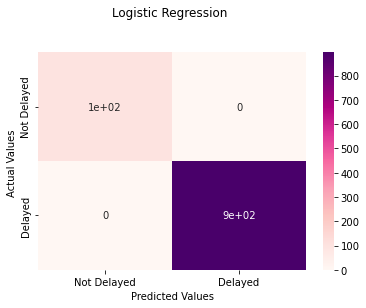

In [613]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import seaborn as sns

x_train,x_test,y_train,y_test = train_test_split(df_features,df_labels,test_size = 0.2, random_state=0)

logRegr_model = logRegr.fit(x_train, y_train)
y_true = y_test
y_pred = logRegr_model.predict(x_test)
accuracy_logRegr = round(accuracy_score(y_true, y_pred),2)

data_accuracy = {}

data_accuracy['Logistic Regression'] = accuracy_logRegr

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('Logistic Regression \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()


Para Logistic Regression la proporción de TP y TN perfecta. Hace todas las predicciones correctamente. No obstante, se ha de tener en cuenta que también hay muchos más positivos que negativos en el dataset.

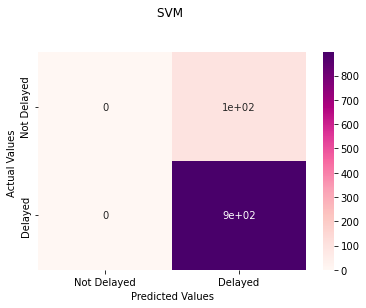

In [614]:
svm_model = svm.fit(x_train, y_train)
y_true = y_test
y_pred = svm_model.predict(x_test)
accuracy_svm = round(accuracy_score(y_true, y_pred),2)

data_accuracy['SVM'] = accuracy_svm

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('SVM \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()

Para SVM la proporción de TP es muy alta, pero también lo es la de FN. De hecho, este modelo solo predice "Delayed", por lo que no parece muy útil. Esto nos lleva a pensar que sus altas puntuaciones en Accuracy se deben a que la proporción de positivos es muy alta en el dataset.

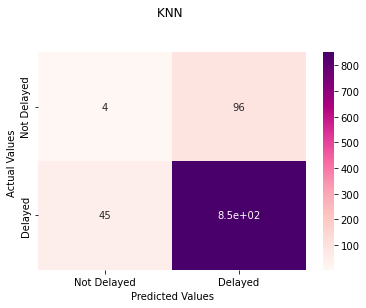

In [615]:
knn_model = knn.fit(x_train, y_train)
y_true = y_test
y_pred = knn_model.predict(x_test)
accuracy_knn = round(accuracy_score(y_true, y_pred),2)

data_accuracy['KNN'] = accuracy_knn

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('KNN \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()

Para KNN la proporción de TP es muy alta, pero la TN es menor que la de FP. Por tanto, podemos deducir que el modelo tiende a predecir valores positivos.

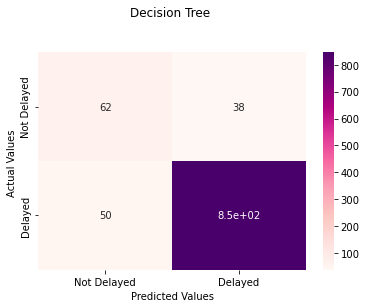

In [616]:
decisionTree_model = decisionTree.fit(x_train, y_train)
y_true = y_test
y_pred = decisionTree_model.predict(x_test)
accuracy_decisionTree = round(accuracy_score(y_true, y_pred),2)

data_accuracy['Decision Tree'] = accuracy_decisionTree

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('Decision Tree \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()

Para Decision Tree la proporción de TP es muy alta, pero los valores de TN, FP y FN son mucho menores y muy similares. Por tanto, podemos deducir que el modelo tiende a predecir valores positivos.

**Precision**

Es la habilidad del modelo para encontrar todos los valores positivos. La puntuación más favorable es 1 y la menos favorables es 0. Cuanto mayor sea esta métrica, menos falsos positivos habrá.

In [617]:
logRegr_model = logRegr.fit(x_train, y_train)
y_true = y_test
y_pred = logRegr_model.predict(x_test)
precision_logRegr = round(precision_score(y_true, y_pred),2)

data_precision = {}

data_precision['Logistic Regression'] = precision_logRegr

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [618]:
svm_model = svm.fit(x_train, y_train)
y_true = y_test
y_pred = svm_model.predict(x_test)
precision_svm = round(precision_score(y_true, y_pred),2)

data_precision['SVM'] = precision_svm

In [619]:
knn_model = knn.fit(x_train, y_train)
y_true = y_test
y_pred = knn_model.predict(x_test)
precision_knn = round(precision_score(y_true, y_pred),2)

data_precision['KNN'] = precision_knn

In [620]:
decisionTree_model = decisionTree.fit(x_train, y_train)
y_true = y_test
y_pred = decisionTree_model.predict(x_test)
precision_decisionTree = round(precision_score(y_true, y_pred),2)

data_precision['Decision Tree'] = precision_decisionTree

**Recall**

Es la habilidad del modelo para encontrar todos los valores positivos. La puntuación más favorable es 1 y la menos favorables es 0. Cuanto mayor sea esta métrica, menos falsos negativos habrá.

In [621]:
logRegr_model = logRegr.fit(x_train, y_train)
y_true = y_test
y_pred = logRegr_model.predict(x_test)
recall_logRegr = round(recall_score(y_true, y_pred),2)

data_recall = {}

data_recall['Logistic Regression'] = recall_logRegr

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [622]:
svm_model = svm.fit(x_train, y_train)
y_true = y_test
y_pred = svm_model.predict(x_test)
recall_svm = round(recall_score(y_true, y_pred),2)

data_recall['SVM'] = recall_svm

In [623]:
knn_model = knn.fit(x_train, y_train)
y_true = y_test
y_pred = knn_model.predict(x_test)
recall_knn = round(recall_score(y_true, y_pred),2)

data_recall['KNN'] = recall_knn

In [624]:
decisionTree_model = decisionTree.fit(x_train, y_train)
y_true = y_test
y_pred = decisionTree_model.predict(x_test)
recall_decisionTree = round(recall_score(y_true, y_pred),2)

data_recall['Decision Tree'] = recall_decisionTree

**F1**

Esta métrica es la media armónica Precision y Recall. De la misma forma, la puntuación más favorable es 1 y la menos favorables es 0. Este valor aumenta en la medida que lo hagan Precision y Recall.

In [625]:
logRegr_model = logRegr.fit(x_train, y_train)
y_true = y_test
y_pred = logRegr_model.predict(x_test)
f1_logRegr = round(f1_score(y_true, y_pred),2)

data_f1 = {}

data_f1['Logistic Regression'] = f1_logRegr

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [626]:
svm_model = svm.fit(x_train, y_train)
y_true = y_test
y_pred = svm_model.predict(x_test)
f1_svm = round(f1_score(y_true, y_pred),2)

data_f1['SVM'] = f1_svm

In [627]:
knn_model = knn.fit(x_train, y_train)
y_true = y_test
y_pred = knn_model.predict(x_test)
f1_knn = round(f1_score(y_true, y_pred),2)

data_f1['KNN'] = f1_knn

In [628]:
decisionTree_model = decisionTree.fit(x_train, y_train)
y_true = y_test
y_pred = decisionTree_model.predict(x_test)
f1_decisionTree = round(f1_score(y_true, y_pred),2)

data_f1['Decision Tree'] = f1_decisionTree

In [629]:
index = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
df_metrics = pd.DataFrame({'Accuracy': [data_accuracy['Logistic Regression'], data_accuracy['SVM'], data_accuracy['KNN'], data_accuracy['Decision Tree']],
                          'Precision': [data_precision['Logistic Regression'], data_precision['SVM'], data_precision['KNN'], data_precision['Decision Tree']],
                          'Recall': [data_recall['Logistic Regression'], data_recall['SVM'], data_recall['KNN'], data_recall['Decision Tree']],
                          'F1': [data_f1['Logistic Regression'], data_f1['SVM'], data_f1['KNN'],data_f1['Decision Tree']]},
                  index=index)
display(df_metrics)

,Accuracy,Precision,Recall,F1
Logistic Regression,1.00,1.00,1.00,1.00
SVM,0.90,0.90,1.00,0.95
KNN,0.86,0.90,0.95,0.92
Decision Tree,0.91,0.96,0.94,0.95


Tras comparar las diferentes métricas de los modelos, observamos que todos ellos tienen puntuaciones muy altas. Pese a que las altas puntuaciones en Accuracy no son muy fiables por la naturaleza de la métrica, al calcular Precision, Recall y F1 hemos comprobado que los modelos tienen una gran capacidad predictiva, al obtener puntuaciones muy cercanas a 1.

## Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

In [630]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_features,df_labels,test_size = 0.2, random_state=0)

logRegr_model = logRegr.fit(x_train,y_train)
svm_model = svm.fit(x_train,y_train)
knn_model = knn.fit(x_train,y_train)
decisionTree_model = decisionTree.fit(x_train,y_train)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

In [631]:
from sklearn.model_selection import cross_val_score
import numpy as np

data_train_test = {}
data_val_int = {}

logRegr_train_test = logRegr_model.score(x_test, y_test)
logRegr_val_int = cross_val_score(logRegr_model, df_features, df_labels, cv=10)
logRegr_val_int = logRegr_val_int.mean()

data_train_test['Logistic Regression'] = round(logRegr_train_test, 2)
data_val_int['Logistic Regression'] = round(logRegr_val_int, 2)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [632]:
svm_train_test = svm_model.score(x_test, y_test)
svm_val_int = cross_val_score(svm_model, df_features, df_labels, cv=10)
svm_val_int = svm_val_int.mean()

data_train_test['SVM'] = round(svm_train_test, 2)
data_val_int['SVM'] = round(svm_val_int, 2)

In [633]:
knn_train_test = knn_model.score(x_test, y_test)
knn_val_int = cross_val_score(knn_model, df_features, df_labels, cv=10)
knn_val_int = knn_val_int.mean()

data_train_test['KNN'] = round(knn_train_test, 2)
data_val_int['KNN'] = round(knn_val_int, 2)

In [634]:
decisionTree_train_test = decisionTree_model.score(x_test, y_test)
decisionTree_val_int = cross_val_score(decisionTree_model, df_features, df_labels, cv=10)
decisionTree_val_int = decisionTree_val_int.mean()

data_train_test['Decision Tree'] = round(decisionTree_train_test, 2)
data_val_int['Decision Tree'] = round(decisionTree_val_int, 2)

In [635]:
df_metrics['Train/Test'] = [data_train_test['Logistic Regression'], data_train_test['SVM'], data_train_test['KNN'], data_train_test['Decision Tree']]
df_metrics['Cross Validation'] = [data_val_int['Logistic Regression'], data_val_int['SVM'], data_val_int['KNN'], data_val_int['Decision Tree']]

display(df_metrics)

,Accuracy,Precision,Recall,F1,Train/Test,Cross Validation
Logistic Regression,1.00,1.00,1.00,1.00,1.00,1.00
SVM,0.90,0.90,1.00,0.95,0.90,0.90
KNN,0.86,0.90,0.95,0.92,0.86,0.86
Decision Tree,0.91,0.96,0.94,0.95,0.91,0.90


He realizado la evaluación del rendimiento a través del cross validation (10-fold). 

He comparado el resultado de esta evaluación para la aproximación train/test y validación interna (en este caso, para comprender los datos, he calculado la media de las 10 puntuaciones).

Excepto para Decision Tree, varía en 0.01, las puntuaciones son iguales con ambos enfoques.

## Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

**SMOTE**

El hecho de que todos los modelos tiendan a predecir valores positivos en una proporción mucho mayor que los negativos me ha llevado a comprobar si las cantidades de los tipos de etiquetas ('Delayed' y 'Not Delayed') son equivalentes en el dataset. Como puede comprobarse, la muestra está muy desequilibrada.

1    4460
0     518
Name: ArrDelayLabels, dtype: int64

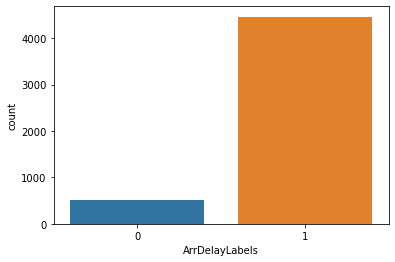

In [636]:
import seaborn as sns
import matplotlib.pyplot as plt

display(df_flights.ArrDelayLabels.value_counts())

sns.countplot(x="ArrDelayLabels", data=df_flights)
plt.show()

Los ejemplares de Delayed (1) son mucho mayores que los Not Delayed (0). Por tanto, será necesario generar una muestra sintética para la etiqueta Not Delayed (0) a través del método SMOTE.

In [637]:
from sklearn.utils import resample

X = pd.concat([x_train, y_train], axis=1)

not_delayed = X[X.ArrDelayLabels == 0]
delayed = X[X.ArrDelayLabels == 1]

not_delayed_upsampled = resample(not_delayed,
                          replace=True,
                          n_samples=len(delayed),
                          random_state=27)

upsampled_all = pd.concat([delayed, not_delayed_upsampled])

display(upsampled_all.ArrDelayLabels.value_counts())

1    3564
0    3564
Name: ArrDelayLabels, dtype: int64

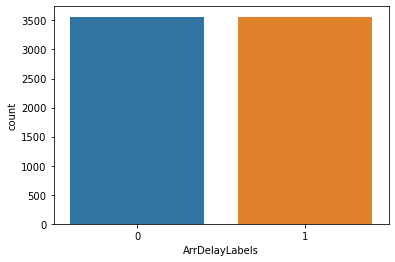

In [638]:
sns.countplot(x="ArrDelayLabels", data=upsampled_all)
plt.show()

Vuelvo a entrenar los modelos con el nuevo dataset que incluye la muestra sintética

In [639]:
X = upsampled_all.drop('ArrDelayLabels', axis=1)
y = upsampled_all.ArrDelayLabels

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

logRegr_model = logRegr.fit(x_train,y_train)
svm_model = svm.fit(x_train,y_train)
knn_model = knn.fit(x_train,y_train)
decisionTree_model = decisionTree.fit(x_train,y_train)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [640]:
data_train_test_afterSMOTE = {}
data_val_int_afterSMOTE = {}

logRegr_train_test = logRegr_model.score(x_test, y_test)
logRegr_val_int = cross_val_score(logRegr_model, X, y, cv=10)
logRegr_val_int = logRegr_val_int.mean()

data_train_test_afterSMOTE['Logistic Regression'] = round(logRegr_train_test, 2)
data_val_int_afterSMOTE['Logistic Regression'] = round(logRegr_val_int, 2)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [641]:
svm_train_test = svm_model.score(x_test, y_test)
svm_val_int = cross_val_score(svm_model, X, y, cv=10)
svm_val_int = svm_val_int.mean()

data_train_test_afterSMOTE['SVM'] = round(svm_train_test, 2)
data_val_int_afterSMOTE['SVM'] = round(svm_val_int, 2)

In [642]:
knn_train_test = knn_model.score(x_test, y_test)
knn_val_int = cross_val_score(knn_model, X, y, cv=10)
knn_val_int = knn_val_int.mean()

data_train_test_afterSMOTE['KNN'] = round(knn_train_test, 2)
data_val_int_afterSMOTE['KNN'] = round(knn_val_int, 2)

In [643]:
decisionTree_train_test = decisionTree_model.score(x_test, y_test)
decisionTree_val_int = cross_val_score(decisionTree_model, X, y, cv=10)
decisionTree_val_int = decisionTree_val_int.mean()

data_train_test_afterSMOTE['Decision Tree'] = round(decisionTree_train_test, 2)
data_val_int_afterSMOTE['Decision Tree'] = round(decisionTree_val_int, 2)

In [644]:
df_metrics['Train/Test after SMOTE'] = [data_train_test_afterSMOTE['Logistic Regression'], data_train_test_afterSMOTE['SVM'], data_train_test_afterSMOTE['KNN'], data_train_test_afterSMOTE['Decision Tree']]
df_metrics['Cross Validation after SMOTE'] = [data_val_int_afterSMOTE['Logistic Regression'], data_val_int_afterSMOTE['SVM'], data_val_int_afterSMOTE['KNN'], data_val_int_afterSMOTE['Decision Tree']]

display(df_metrics)

,Accuracy,Precision,Recall,F1,Train/Test,Cross Validation,Train/Test after SMOTE,Cross Validation after SMOTE
Logistic Regression,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
SVM,0.90,0.90,1.00,0.95,0.90,0.90,0.68,0.68
KNN,0.86,0.90,0.95,0.92,0.86,0.86,0.89,0.89
Decision Tree,0.91,0.96,0.94,0.95,0.91,0.90,0.97,0.97


Tras crear la muestra sintética, la predicción de los modelos ha cambiado. Para Decision Tree y KNN ha aumentado, para Logistic Regression se ha mantenido y SVM ha disminuido considerablemente 0.22 puntos. Esto quiere decir que la capacidad de predicción de SVM no era tan alta como parecía, y que estaba "acostumbrado" a la etiqueta mayoritaria. Aunque esta puntuación es más baja, es preferible, ya que es más realista al estar la muestra equilibrada.

**Estandarización de los datos**

Por otro lado, considero que puedo mejorar la eficiencia de los modelos (y en especial de Logistic Regression, debido a los Warnings que genera Jupyter) estandarizando los datos a partir de la muestra equilibrada. Antes que nada, compruebo la existencia de outliers para decidir cómo gestionarlos.

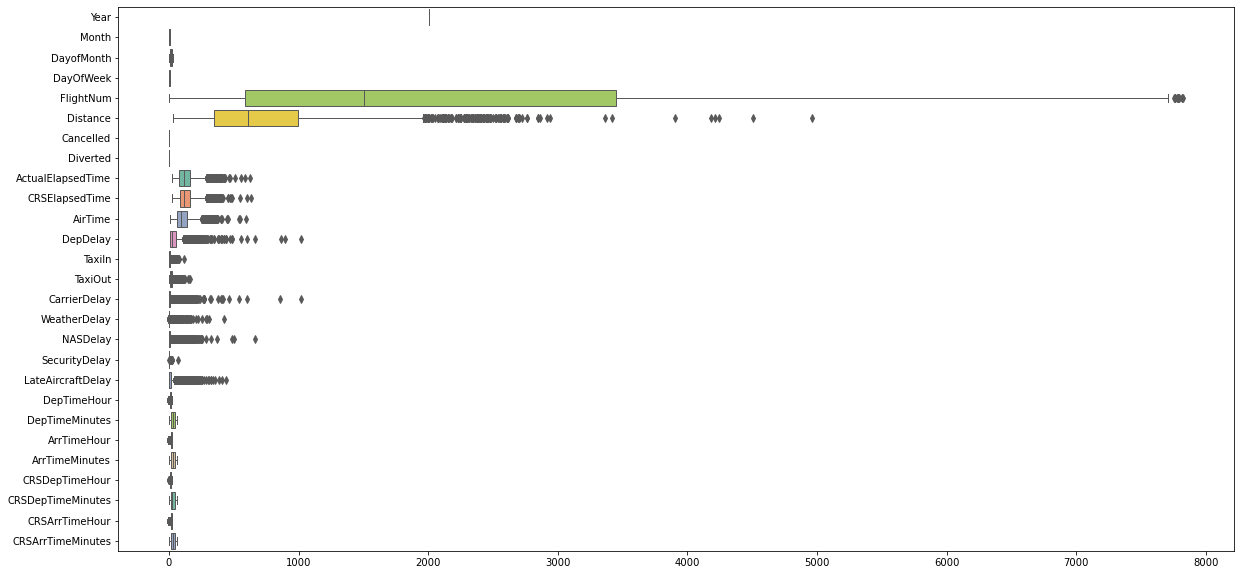

In [645]:
import seaborn as sns
    
ax = sns.boxplot(data=df_features, orient="h", palette="Set2", linewidth=1)
plt.gcf().set_size_inches(20, 10)

Como podemos ver, las variables tienen muchos outliers. Por ello, a la hora de estandarizar los datos, utilizaré RobustScaler. El RobustScaler impide que los valores atípicos distorsionen los resultados ya que elimina la mediana y escala los datos de acuerdo con el rango IQR (el rango entre el primer cuartil, 25, y el tercer cuartil, 75).

In [646]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline 

data_train_test_afterRobustScaler = {}
data_val_int_afterRobustScaler = {}

pipe = make_pipeline(RobustScaler(), LogisticRegression())
logRegr_fitted = pipe.fit(x_train, y_train)
logRegr_train_test = logRegr_fitted.score(x_test, y_test)
logRegr_val_int = np.mean(cross_val_score(logRegr_fitted, X, y, cv=10))
        
data_train_test_afterRobustScaler['Logistic Regression'] = round(logRegr_train_test, 2)
data_val_int_afterRobustScaler['Logistic Regression'] = round(logRegr_val_int, 2)

In [647]:
pipe = make_pipeline(RobustScaler(), SVC())
svm_fitted = pipe.fit(x_train, y_train)
svm_train_test = svm_fitted.score(x_test, y_test)
svm_val_int = np.mean(cross_val_score(svm_fitted, X, y, cv=10))
        
data_train_test_afterRobustScaler['SVM'] = round(svm_train_test, 2)
data_val_int_afterRobustScaler['SVM'] = round(svm_val_int, 2)

In [648]:
pipe = make_pipeline(RobustScaler(), KNeighborsClassifier())
knn_fitted = pipe.fit(x_train, y_train)
knn_train_test = knn_fitted.score(x_test, y_test)
knn_val_int = np.mean(cross_val_score(knn_fitted, X, y, cv=10))
        
data_train_test_afterRobustScaler['KNN'] = round(knn_train_test, 2)
data_val_int_afterRobustScaler['KNN'] = round(knn_val_int, 2)

In [649]:
pipe = make_pipeline(RobustScaler(), DecisionTreeClassifier())
decisionTree_fitted = pipe.fit(x_train, y_train)
decisionTree_train_test = decisionTree_fitted.score(x_test, y_test)
decisionTree_val_int = np.mean(cross_val_score(decisionTree_fitted, X, y, cv=10))
        
data_train_test_afterRobustScaler['Decision Tree'] = round(decisionTree_train_test, 2)
data_val_int_afterRobustScaler['Decision Tree'] = round(decisionTree_val_int, 2)

In [650]:
df_metrics['Train/Test after RobustScaler'] = [data_train_test_afterRobustScaler['Logistic Regression'], data_train_test_afterRobustScaler['SVM'], data_train_test_afterRobustScaler['KNN'], data_train_test_afterRobustScaler['Decision Tree']]
df_metrics['Cross Validation after RobustScaler'] = [data_val_int_afterRobustScaler['Logistic Regression'], data_val_int_afterRobustScaler['SVM'], data_val_int_afterRobustScaler['KNN'], data_val_int_afterRobustScaler['Decision Tree']]

display(df_metrics)

,Accuracy,Precision,Recall,F1,Train/Test,Cross Validation,Train/Test after SMOTE,Cross Validation after SMOTE,Train/Test after RobustScaler,Cross Validation after RobustScaler
Logistic Regression,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.96,0.96
SVM,0.90,0.90,1.00,0.95,0.90,0.90,0.68,0.68,0.87,0.86
KNN,0.86,0.90,0.95,0.92,0.86,0.86,0.89,0.89,0.92,0.92
Decision Tree,0.91,0.96,0.94,0.95,0.91,0.90,0.97,0.97,0.97,0.97


Tras la estandarización de los datos, SVM ha mejorado notablemente su capacidad de predicción. KNN también ha mejorado, aunque en menor medida, y Decision Tree no ha experimentado ningún cambio. Logistic Regression, al contrario, ha disminuido ligeramente su puntuación, aunque sigue siendo muy cercana a 1. Esto nos hace deducir que Logistic Regression había adaptado su aprendizaje a los valores atípicos.

## Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions

In [651]:
X.drop(columns=['DepDelay'],inplace=True)
display(X.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Distance',
       'Cancelled', 'Diverted', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepTimeHour',
       'DepTimeMinutes', 'ArrTimeHour', 'ArrTimeMinutes', 'CRSDepTimeHour',
       'CRSDepTimeMinutes', 'CRSArrTimeHour', 'CRSArrTimeMinutes'],
      dtype='object')

In [652]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

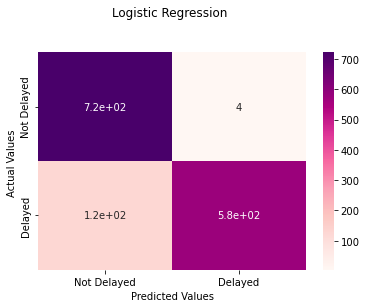

In [653]:
data_train_test_withoutDepDelay = {}
data_val_int_withoutDepDelay = {}

pipe = make_pipeline(RobustScaler(), LogisticRegression())
logRegr_fitted = pipe.fit(x_train, y_train)
logRegr_train_test = logRegr_fitted.score(x_test, y_test)
logRegr_val_int = np.mean(cross_val_score(logRegr_fitted, X, y, cv=10))
        
data_train_test_withoutDepDelay['Logistic Regression'] = round(logRegr_train_test, 2)
data_val_int_withoutDepDelay['Logistic Regression'] = round(logRegr_val_int, 2)

y_true = y_test
y_pred = logRegr_fitted.predict(x_test)
accuracy_logRegr = round(accuracy_score(y_true, y_pred),2)
precision_logRegr = round(precision_score(y_true, y_pred),2)
recall_logRegr = round(recall_score(y_true, y_pred),2)
f1_logRegr = round(f1_score(y_true, y_pred),2)

data_accuracy2 = {}
data_precision2 = {}
data_recall2 = {}
data_f12 = {}

data_accuracy2['Logistic Regression'] = accuracy_logRegr
data_precision2['Logistic Regression'] = precision_logRegr
data_recall2['Logistic Regression'] = recall_logRegr
data_f12['Logistic Regression'] = f1_logRegr

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('Logistic Regression \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()

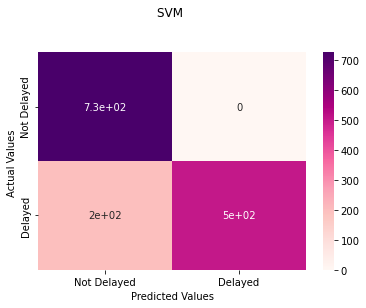

In [654]:
pipe = make_pipeline(RobustScaler(), SVC())
svm_fitted = pipe.fit(x_train, y_train)
svm_train_test = svm_fitted.score(x_test, y_test)
svm_val_int = np.mean(cross_val_score(svm_fitted, X, y, cv=10))
        
data_train_test_withoutDepDelay['SVM'] = round(svm_train_test, 2)
data_val_int_withoutDepDelay['SVM'] = round(svm_val_int, 2)

y_true = y_test
y_pred = svm_fitted.predict(x_test)
accuracy_svm = round(accuracy_score(y_true, y_pred),2)
precision_svm = round(precision_score(y_true, y_pred),2)
recall_svm = round(recall_score(y_true, y_pred),2)
f1_svm = round(f1_score(y_true, y_pred),2)

data_accuracy2['SVM'] = accuracy_svm
data_precision2['SVM'] = precision_svm
data_recall2['SVM'] = recall_svm
data_f12['SVM'] = f1_svm

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('SVM \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()

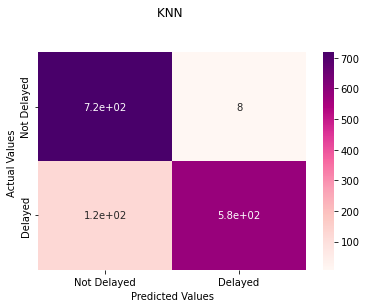

In [655]:
pipe = make_pipeline(RobustScaler(), KNeighborsClassifier())
knn_fitted = pipe.fit(x_train, y_train)
knn_train_test = knn_fitted.score(x_test, y_test)
knn_val_int = np.mean(cross_val_score(knn_fitted, X, y, cv=10))
        
data_train_test_withoutDepDelay['KNN'] = round(knn_train_test, 2)
data_val_int_withoutDepDelay['KNN'] = round(knn_val_int, 2)

y_true = y_test
y_pred = knn_fitted.predict(x_test)
accuracy_knn = round(accuracy_score(y_true, y_pred),2)
precision_knn = round(precision_score(y_true, y_pred),2)
recall_knn = round(recall_score(y_true, y_pred),2)
f1_knn = round(f1_score(y_true, y_pred),2)


data_accuracy2['KNN'] = accuracy_knn
data_precision2['KNN'] = precision_knn
data_recall2['KNN'] = recall_knn
data_f12['KNN'] = f1_knn

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('KNN \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()

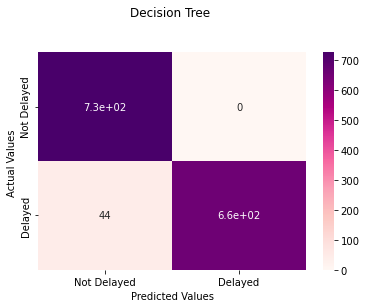

In [656]:
pipe = make_pipeline(RobustScaler(), DecisionTreeClassifier())
decisionTree_fitted = pipe.fit(x_train, y_train)
decisionTree_train_test = decisionTree_fitted.score(x_test, y_test)
decisionTree_val_int = np.mean(cross_val_score(decisionTree_fitted, X, y, cv=10))
        
data_train_test_withoutDepDelay['Decision Tree'] = round(decisionTree_train_test, 2)
data_val_int_withoutDepDelay['Decision Tree'] = round(decisionTree_val_int, 2)

y_true = y_test
y_pred = decisionTree_fitted.predict(x_test)
accuracy_decisionTree = round(accuracy_score(y_true, y_pred),2)
precision_decisionTree = round(precision_score(y_true, y_pred),2)
recall_decisionTree = round(recall_score(y_true, y_pred),2)
f1_decisionTree = round(f1_score(y_true, y_pred),2)

data_accuracy2['Decision Tree'] = accuracy_decisionTree
data_precision2['Decision Tree'] = precision_decisionTree
data_recall2['Decision Tree'] = recall_decisionTree
data_f12['Decision Tree'] = f1_decisionTree

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='RdPu')
ax.set_title('Decision Tree \n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not Delayed','Delayed'])
ax.yaxis.set_ticklabels(['Not Delayed','Delayed'])
plt.show()

In [657]:
#df_metrics['Train/Test without DepDelay'] = [data_train_test_withoutDepDelay['Logistic Regression'], data_train_test_withoutDepDelay['SVM'], data_train_test_withoutDepDelay['KNN'], data_train_test_withoutDepDelay['Decision Tree']]
#df_metrics['Cross Validation without DepDelay'] = [data_val_int_withoutDepDelay['Logistic Regression'], data_val_int_withoutDepDelay['SVM'], data_val_int_withoutDepDelay['KNN'], data_val_int_withoutDepDelay['Decision Tree']]
df_metrics['Accuracy without DepDelay'] = [data_accuracy2['Logistic Regression'], data_accuracy2['SVM'], data_accuracy2['KNN'], data_accuracy2['Decision Tree']]
df_metrics['Precision without DepDelay'] = [data_precision2['Logistic Regression'], data_precision2['SVM'], data_precision2['KNN'], data_precision2['Decision Tree']]
df_metrics['Recall without DepDelay'] = [data_recall2['Logistic Regression'], data_recall2['SVM'], data_recall2['KNN'], data_recall2['Decision Tree']]
df_metrics['F1 without DepDelay'] = [data_f12['Logistic Regression'], data_f12['SVM'], data_f12['KNN'], data_f12['Decision Tree']]

display(df_metrics)

,Accuracy,Precision,Recall,F1,Train/Test,Cross Validation,Train/Test after SMOTE,Cross Validation after SMOTE,Train/Test after RobustScaler,Cross Validation after RobustScaler,Accuracy without DepDelay,Precision without DepDelay,Recall without DepDelay,F1 without DepDelay
Logistic Regression,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.96,0.96,0.91,0.99,0.82,0.90
SVM,0.90,0.90,1.00,0.95,0.90,0.90,0.68,0.68,0.87,0.86,0.86,1.00,0.72,0.84
KNN,0.86,0.90,0.95,0.92,0.86,0.86,0.89,0.89,0.92,0.92,0.91,0.99,0.83,0.90
Decision Tree,0.91,0.96,0.94,0.95,0.91,0.90,0.97,0.97,0.97,0.97,0.97,1.00,0.94,0.97


Tras la supresión de la variable del dataset
- Logistic Regression ha pasado de ser un modelo perfecto a tener puntuaciones muy cercanas a uno. Por tanto, DepDelay aportaba información importante para el aprendizaje del modelo. El modelo ha aumentado considerablemente la predicción de falsos negativos.
- SVM ha adquirido una Precision perfecta, pero la pérdida de datos relativa a DepDelay ha disminuido el resto de puntuaciones. Este modelo también ha aumentado considerablemente la predicción de falsos negativos.
- KNN ha mejorado su Accuracy y Precision pero ha disminuido su Recall y F1. Este modelo también ha aumentado considerablemente la predicción de falsos negativos.
- Decision Tree ha adquirido una Precision perfecta y ha mejorado el resto de sus puntuaciones a excepción de Recall, que se ha mantenido igual, por lo que se ha beneficiado de tener una varible menos que considerar.